## TITANIC DATASET

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### The column heading variables have the following meanings:

#__PassengerId__: Serial numbers given to the passengers
#__Survived__: Survival (0 = no; 1 = yes)
#__Pclass__: Passenger class (1 = first; 2 = second; 3 = third)
#__Name__: Name
#__Sex__: Sex
#__Age__: Age
#__SibSp__: Number of siblings/spouses aboard
#__Parch__: Number of parents/children aboard
#__Ticket__: Ticket number
#__Fare__: Passenger fare
#__Cabin__: Cabin
#__Embarked__: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
# it is important to know what kind of data we are working with

print(df.shape)
print(df.dtypes)

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
# it is also important to know the no. of NaN values and where they lie

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### by now we have a rough idea of the structure and meaning of the data in our dataframe, now we proceed in analysing it to make it more comprehensible

### for this we need to analyze the different columns and the contribution of each towards the survival of the passenger

##### clearly first column i.e 'PassengerId' is of no use to us, as it is just serially allotted numbers to all the passengers.

In [5]:
# we drop the 'PassengerId' column right at the beginning

df.drop('PassengerId', axis = 1, inplace = True)
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##### we start with the second column i.e 'Survived' now

In [6]:
# let us check the survival rate of the passengers

df['Survived'].mean()

0.3838383838383838

##### The calculation shows that only 38% of the passengers survived. It seems unlikely that all of the passengers would have had equal chances at survival, so we will continue breaking down the data to further examine how each column contributed to survival.

##### moving on to the next column i.e 'Pclass'

##### looking at just the dataset we cannot tell if "passenger class" plays a role in their survival, hence we try to analyse the data with respect to the given attribute

In [7]:
# we can group data by class and view the averages for each column

df.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


##### We can start drawing some interesting insights from this data. 
###### Firstly, passengers in first class had a 62% chance of survival, compared to a 25.5% chance for those in 3rd class; with the middle class' chance of survival predictably lying in between these two, as it should.
###### Secondly, the lower classes generally consisted of younger people. 
###### And thirdly, the ticket prices for first class were predictably much higher than those for second and third class.

##### moving on to the next column i.e 'Name'

##### It's quite clear that the name of the passenger cannot possibly play any part in their survival, hence is considered redundant. As for the purpose of identification of a passenger we already have a "passenger id" for that purpose.

In [8]:
# we drop the 'Name' column

df.drop('Name', axis = 1, inplace = True)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
7,0,3,male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,female,14.0,1,0,237736,30.0708,NaN,C


##### moving on to the next column i.e 'Sex'

In [9]:
# now we group the data by sex

sex_grouping = df.groupby('Sex').mean()
sex_grouping

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [10]:
sex_grouping['Survived'].plot.bar(width = 0.5, color = 'green')


<AxesSubplot:xlabel='Sex'>

##### Now as we can clearly observe, survival rate of female passengers is much higher than male passengers. This can happen under two circumstances:
##### first, no. of female passengers was much higher than male passengers, or
##### second, when the Titanic was sinking there was some policy/scheme in place that allowed more female passengers to survive.

###### We'll try to find out which of the above was it.

In [11]:
# drawing a pie chart for number of males and females aboard

males = (df['Sex'] == "male").sum()
females = (df['Sex'] == "female").sum()

print(males)
print(females)


577
314


##### As we can clearly see the number of male passnegers far exceeded the number of female passengers.

##### While the Titanic was sinking, the officers famously prioritized who was allowed in a lifeboat with the strict maritime tradition of evacuating women and children first. Our statistical results clearly reflect the first part of this policy.

In [12]:
# let us see how the "female" across all "Pclass" fared
class_sex_grouping = df.groupby(['Pclass','Sex']).mean()
class_sex_grouping

Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                        
1      female  0.968085  34.611765  0.553191  0.457447  106.125798
       male    0.368852  41.281386  0.311475  0.278689   67.226127
2      female  0.921053  28.722973  0.486842  0.605263   21.970121
       male    0.157407  30.740707  0.342593  0.222222   19.741782
3      female  0.500000  21.750000  0.895833  0.798611   16.118810
       male    0.135447  26.507589  0.498559  0.224784   12.661633

<AxesSubplot:xlabel='Pclass,Sex'>

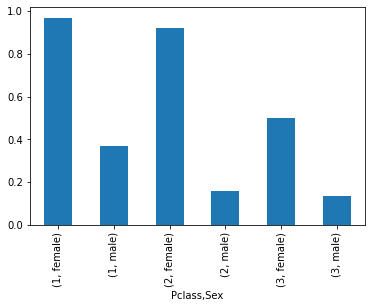

In [13]:
class_sex_grouping['Survived'].plot.bar()

##### Also, across all classes, women were much more likely to survive than the men.

##### for analysis purposes it is better if we have the values of all attributes as similar datatypes and the 'Sex' attribute is fairly binary in nature. Hence, we assign specific numerical values to each sex i.e male or female.

In [14]:
# changing Value for "male, female" string values to numeric values ; male=1 and female=2
   
diccionario={'male':1, 'female':2}
df["Gender"] = df["Sex"].replace(diccionario)

#We have created a new column called 'Gender' and 
#filling it with values 1 ,2 based on the values of 'Sex' column

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1


In [15]:
# we drop the 'Sex' column, since we have no use of it now
df.drop('Sex', axis = 1, inplace = True)
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,0,3,35.0,0,0,373450,8.0500,NaN,S,1
5,0,3,NaN,0,0,330877,8.4583,NaN,Q,1
6,0,1,54.0,0,0,17463,51.8625,E46,S,1
7,0,3,2.0,3,1,349909,21.0750,NaN,S,1
8,1,3,27.0,0,2,347742,11.1333,NaN,S,2
9,1,2,14.0,1,0,237736,30.0708,NaN,C,2


##### moving on to the next column i.e 'Age'

##### The effectiveness of the second part of this “Women and children first” policy can be deduced by breaking down the survival rate by age.

In [16]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

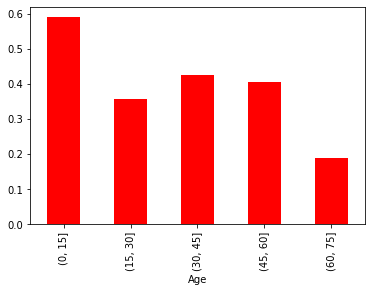

In [17]:
group_age_split = pd.cut(df['Age'], np.arange(0, 80, 15))
age_grouping = df.groupby(group_age_split).mean()
age_grouping['Survived'].plot.bar(color = 'red')


##### Here we can see that children were indeed the most likely age group to survive at 60%.

##### as we saw earlier there are quite a few NaN values in the 'Age' column of the dataframe. We cannot remove all these columns as it would result in loss of a significant amount of data
##### so, we fill the null values of the 'Age' column i.e  fill "mean survived age" (mean age of the survived people) in the column where the person has survived and "mean not survived age" (mean age of the people who have not survived) in the column where person has not survived

In [18]:
#finding mean survived age
meanS= df[df.Survived==1].Age.mean()
print(meanS)

# finding the mean not survived age
meanNS=df[df.Survived==0].Age.mean()
print(meanNS)

28.343689655172415
30.62617924528302


##### here, we create a new 'age' column , filling values in it with a condition (given inside), which if True then given values (here meanS) is put in place of last values else nothing happens i.e. simply the values are copied from the "Age" column of the dataframe

In [19]:
df['age'] = np.where(pd.isnull(df['Age']) & df['Survived']==1  , meanS, df['Age'])
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,age
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2,38.0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,26.0
3,1,1,35.0,1,0,113803,53.1000,C123,S,2,35.0
4,0,3,35.0,0,0,373450,8.0500,NaN,S,1,35.0
5,0,3,NaN,0,0,330877,8.4583,NaN,Q,1,NaN
6,0,1,54.0,0,0,17463,51.8625,E46,S,1,54.0
7,0,3,2.0,3,1,349909,21.0750,NaN,S,1,2.0
8,1,3,27.0,0,2,347742,11.1333,NaN,S,2,27.0
9,1,2,14.0,1,0,237736,30.0708,NaN,C,2,14.0


##### Now the 'age' column contains null entries in the places where "survived" is equal to zero
##### Filling those null values in one go with meanNS

In [20]:
df['age'].fillna(meanNS, inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,age
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.000000
1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2,38.000000
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,26.000000
3,1,1,35.0,1,0,113803,53.1000,C123,S,2,35.000000
4,0,3,35.0,0,0,373450,8.0500,NaN,S,1,35.000000
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,211536,13.0000,NaN,S,1,27.000000
887,1,1,19.0,0,0,112053,30.0000,B42,S,2,19.000000
888,0,3,NaN,1,2,W./C. 6607,23.4500,NaN,S,2,30.626179
889,1,1,26.0,0,0,111369,30.0000,C148,C,1,26.000000


In [21]:
# checking if 'age' column is devoid of NaN values
df.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Gender        0
age           0
dtype: int64

In [22]:
# we can safely delete the 'Age' column now

df.drop('Age', axis = 1, inplace = True)
df.head(10)

,Survived,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,age
0,0,3,1,0,A/5 21171,7.2500,NaN,S,1,22.000000
1,1,1,1,0,PC 17599,71.2833,C85,C,2,38.000000
2,1,3,0,0,STON/O2. 3101282,7.9250,NaN,S,2,26.000000
3,1,1,1,0,113803,53.1000,C123,S,2,35.000000
4,0,3,0,0,373450,8.0500,NaN,S,1,35.000000
5,0,3,0,0,330877,8.4583,NaN,Q,1,30.626179
6,0,1,0,0,17463,51.8625,E46,S,1,54.000000
7,0,3,3,1,349909,21.0750,NaN,S,1,2.000000
8,1,3,0,2,347742,11.1333,NaN,S,2,27.000000
9,1,2,1,0,237736,30.0708,NaN,C,2,14.000000


##### now we take a look at the columns 'Ticket' and 'Cabin'. 
##### we can consider these redundant as the attribute 'Ticket' is a set of random string/numbers and majority of the values in 'Cabin' attribute are NaN.

In [23]:
# we drop the above columns
df.drop(['Ticket','Cabin'], axis = 1, inplace = True)
df.head(10)

,Survived,Pclass,SibSp,Parch,Fare,Embarked,Gender,age
0,0,3,1,0,7.2500,S,1,22.000000
1,1,1,1,0,71.2833,C,2,38.000000
2,1,3,0,0,7.9250,S,2,26.000000
3,1,1,1,0,53.1000,S,2,35.000000
4,0,3,0,0,8.0500,S,1,35.000000
5,0,3,0,0,8.4583,Q,1,30.626179
6,0,1,0,0,51.8625,S,1,54.000000
7,0,3,3,1,21.0750,S,1,2.000000
8,1,3,0,2,11.1333,S,2,27.000000
9,1,2,1,0,30.0708,C,2,14.000000


In [24]:
# applying statistical approach on the above dataframe to analyse 
# which feature or column is affecting the survival rate and which is useless column

df.describe()

,Survived,Pclass,SibSp,Parch,Fare,Gender,age
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208,1.352413,29.750072
std,0.486592,0.836071,1.102743,0.806057,49.693429,0.477990,13.010682
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.420000
25%,0.000000,2.000000,0.000000,0.000000,7.910400,1.000000,22.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,1.000000,30.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,2.000000,35.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,2.000000,80.000000


##### now we're curious about analyzing whether the embark points  i.e the port  the passengers board the ship, played any role in deciding the survivors

In [25]:
df.groupby('Embarked').mean()

,Survived,Pclass,SibSp,Parch,Fare,Gender,age
Embarked,,,,,,,
C,0.553571,1.886905,0.386905,0.363095,59.954144,1.434524,30.581905
Q,0.389610,2.909091,0.428571,0.168831,13.276030,1.467532,29.051533
S,0.336957,2.350932,0.571429,0.413043,27.079812,1.315217,29.553705


<AxesSubplot:xlabel='Embarked'>

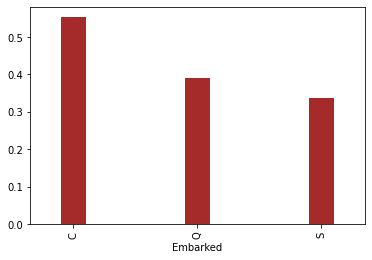

In [26]:
embark_grouping = df.groupby('Embarked').mean()
embark_grouping['Survived'].plot.bar(width = 0.2, color = 'brown')

##### Here we interestingly observe, that the embark point might actually have played some part in deciding the survivors

In [27]:
df.isnull().sum()

Survived    0
Pclass      0
SibSp       0
Parch       0
Fare        0
Embarked    2
Gender      0
age         0
dtype: int64

##### now, the only NaN value that exist, are 2 values in embark column
##### 2 null values among total entries of 891 rows, and hence we can safely say that deleting two rows from 891 rows will not affect the result. So rather than trying to fill those null values with some vales. We can simply remove them. 

In [28]:
df.dropna(inplace = True)
df.isnull().sum()

Survived    0
Pclass      0
SibSp       0
Parch       0
Fare        0
Embarked    0
Gender      0
age         0
dtype: int64

In [29]:
df

,Survived,Pclass,SibSp,Parch,Fare,Embarked,Gender,age
0,0,3,1,0,7.2500,S,1,22.000000
1,1,1,1,0,71.2833,C,2,38.000000
2,1,3,0,0,7.9250,S,2,26.000000
3,1,1,1,0,53.1000,S,2,35.000000
4,0,3,0,0,8.0500,S,1,35.000000
...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,S,1,27.000000
887,1,1,0,0,30.0000,S,2,19.000000
888,0,3,1,2,23.4500,S,2,30.626179
889,1,1,0,0,30.0000,C,1,26.000000


# Utilizando pandas_profiling

In [30]:
#!pip install pandas-profiling
# https://pypi.org/project/pandas-profiling/
import pandas_profiling

In [31]:
report = pandas_profiling.ProfileReport(df)
report.to_file("report_titanic.html")

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]